In [23]:
import tensorflow as tf
from agents.MemoryBuffer import MemoryBuffer
from agents.NeuralNetwork import NeuralNetwork
from environment.Simulator import Simulator
from agents.SlidingWindowAgent import SlidingWindowAgent
from environment.Config import ConfigTimeSeries
from environment.BaseEnvironment import TimeSeriesEnvironment
from environment.WindowStateEnvironment import WindowStateEnvironment


# for subdir, dirs, files in os.walk("../ts_data/A1Benchmark"):
#     for file in files:
#         if file.find('.csv') != -1:


config = ConfigTimeSeries(seperator=",", window=1)
env = WindowStateEnvironment(
    TimeSeriesEnvironment(verbose=True, filename="A1Benchmark/real_43.csv", config=config, window=True))

dqn = NeuralNetwork(input_dim=env.window_size,
                    input_neurons=env.window_size + 1).keras_model

agent = SlidingWindowAgent(dqn=dqn, memory=MemoryBuffer(max=50000, id="sliding_window"), alpha=0.0001,
                           gamma=0.99, epsilon=1,
                           epsilon_end=0.0, epsilon_decay=0.9, fit_epoch=100, action_space=2, batch_size=512)

TimeSeries from: A1Benchmark/real_43.csv
 Header(labeled):
       value  anomaly
0  1.428015        0
1  1.407458        0
2  1.390932        0 
Header(unlabeled):
       value
0  1.428015
1  1.407458
2  1.390932 
Rows:
 1440
MeanValue:
 1.56
MaxValue:
 3.06
MinValue:
 1.33


Successfully loaded Object from memory_sliding_window.obj
Training episode 0 took 3.892669200897217 seconds Update Target Model
Training episode 1 took 1.986295223236084 seconds 
Training episode 2 took 1.8635165691375732 seconds Update Target Model
Training episode 3 took 2.0064241886138916 seconds 
Training episode 4 took 1.955765962600708 seconds Update Target Model
Training episode 5 took 2.331204414367676 seconds 
Training episode 6 took 2.2510151863098145 seconds Update Target Model
Training episode 7 took 2.253845691680908 seconds 
Training episode 8 took 2.1502511501312256 seconds Update Target Model
Training episode 9 took 1.994671106338501 seconds 
Training episode 10 took 2.035555124282837 seconds Update Target Model
Training episode 11 took 2.0614895820617676 seconds 
Training episode 12 took 2.0674729347229004 seconds Update Target Model
Training episode 13 took 2.066476583480835 seconds 
Training episode 14 took 2.049525499343872 seconds Update Target Model
Training episo

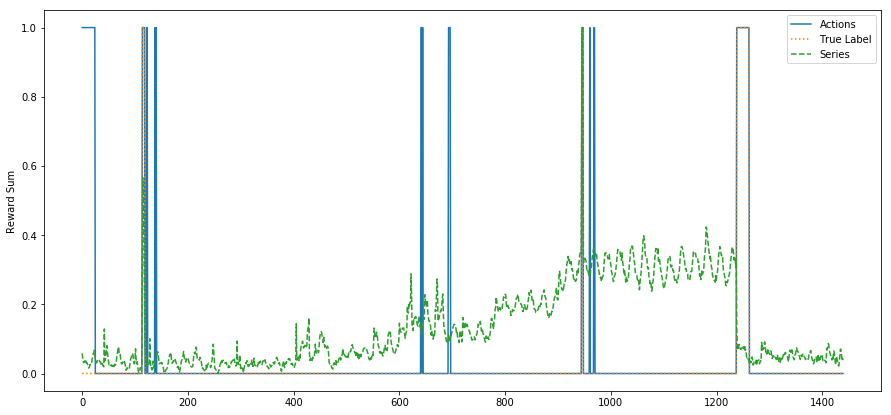

True

In [24]:
simulation = Simulator(21, agent, env, 2)
agent.memory.init_memory(env=env)
simulation.run()